## TimeSeries Forcasting Week 3 - R implementation

### Simulate Time series and look at its properties

In [46]:
##
et <- read.csv("../data/module3_data_Identifying_ARMA.csv", header = TRUE,
stringsAsFactors = FALSE)
head(et)

et
-1.2138662
-0.2854597
0.5902700
0.8285463
-0.9954260
-0.3716332


In [47]:
## mean and sd
mean(et$et)
sd(et$et)

[1] -0.02845985

[1] 0.9819995

In [48]:
newet <- rbind(et,et,et,et,et) # populate values
## generate variable for AR
yar <- rep(0, 2500)
for ( i in 2:2500 ) {
    yar[i] <- 3.00 + newet$et[i] + 0.55 * yar[i-1]
}

In [49]:
##generate variable for MA
yma <- rep(0,2500)
for (i in 2:2500) {
yma[i] <- -2.5 + newet$et[i] + 0.70 * newet$et[i-1]
}

In [50]:
## generating an arma(1,1) variable
yArma <- rep(0,2500)
for (i in 2:2500) {
    yArma[i] <- 0.5 +0.55 * yArma[i-1] + newet$et[i] + 0.70 * newet$et[i-1]
}

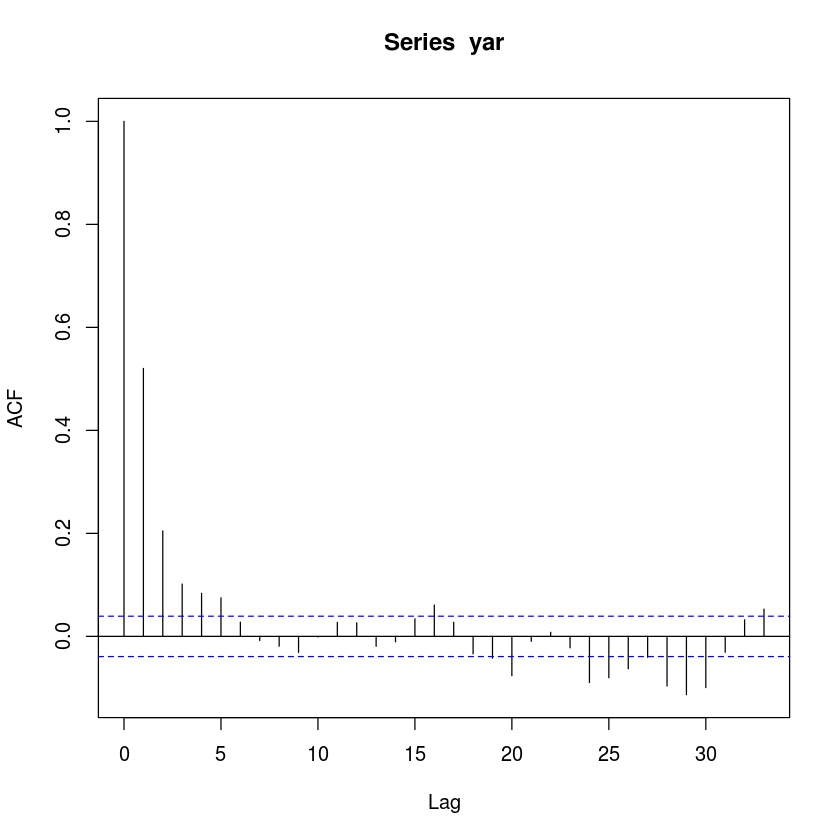

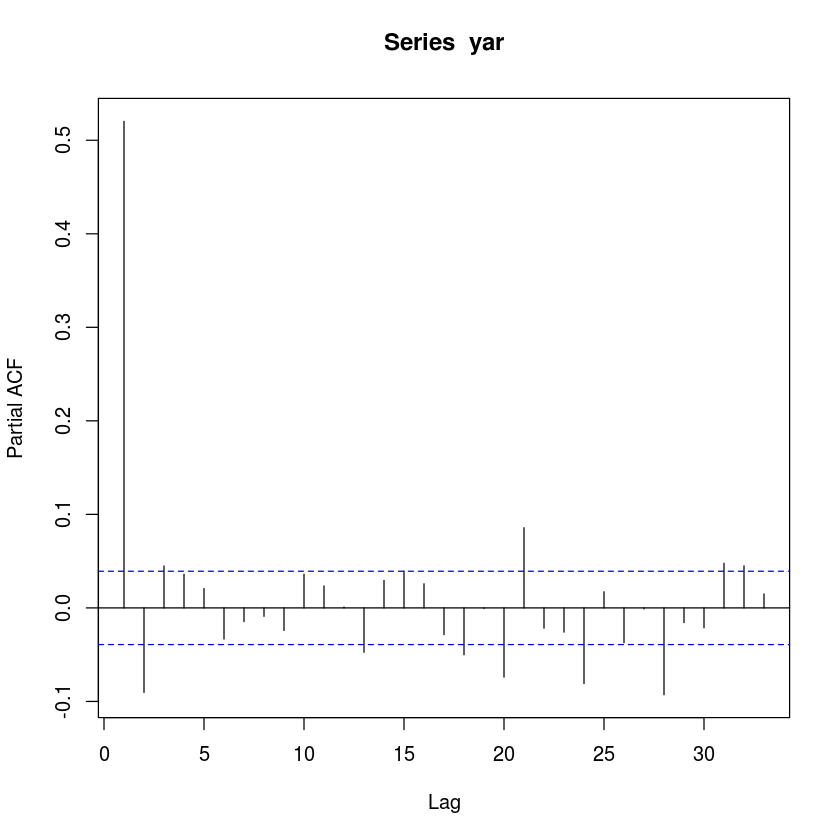

In [51]:
## plots for autocorrelation function (ACF) and partial autocorrelation function (PACF)
yaracf <- acf(yar)
yarpacf  <- pacf(yar)

In [52]:
## we can get the raw number to look at as well 
yaracf


Autocorrelations of series ‘yar’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.520  0.205  0.102  0.084  0.075  0.028 -0.008 -0.019 -0.031 -0.001 
    11     12     13     14     15     16     17     18     19     20     21 
 0.027  0.026 -0.019 -0.010  0.034  0.061  0.027 -0.034 -0.042 -0.076 -0.010 
    22     23     24     25     26     27     28     29     30     31     32 
 0.008 -0.022 -0.090 -0.080 -0.063 -0.041 -0.096 -0.113 -0.099 -0.031  0.032 
    33 
 0.053 

### Assuming stationary, AR model lag selections

In [53]:
#install.packages("dplyr")
library(dplyr)    ## load library
library(dyn)

## read data , PE Ratio data 
df <- read.csv("../data/module3_data_PE_Ratios.csv", header = T, stringsAsFactors
= F)
head(df)

dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
1954-02-01,1954-02-28 23:59:59.999,1954-02-26,NA,NA,NA,NA,9.920
1954-03-01,1954-03-31 23:59:59.999,1954-03-31,NA,NA,NA,NA,10.170
1954-04-01,1954-04-30 23:59:59.999,1954-04-30,NA,NA,NA,NA,10.570
1954-05-01,1954-05-31 23:59:59.999,1954-05-31,NA,NA,NA,NA,11.000
1954-06-01,1954-06-30 23:59:59.999,1954-06-30,NA,NA,NA,NA,11.080
1954-07-01,1954-07-31 23:59:59.999,1954-07-30,NA,NA,NA,NA,12.174


In [54]:
## create another df2 with only date and pe_ind variable
df2 <- df %>% select(date, pe_ind)
head(df2)

date,pe_ind
1954-02-26,NA
1954-03-31,NA
1954-04-30,NA
1954-05-31,NA
1954-06-30,NA
1954-07-30,NA


In [55]:
## build three different models3
#model 1 = AR(1)
model1 <- arima(df$pe_ind, order = c(1L,0L,0L))
#model 2 = has AR terms at lags 1 and 8 only;
model2 <- arima(df$pe_ind, order = c(8,0,0), fixed = c(NA,0,0,0,0,0,0,NA,NA), optim.method="Nelder-Mead")
#model 3 = has AR terms at lags 1 and 8, and an MA term at lag 8.
model3 <- arima(df$pe_ind, order = c(8,0,8), fixed = c(NA,0,0,0,0,0,0,NA,0,0,0,0,0,0,0,NA,NA), optim.method="Nelder-Mead")

Warning message in arima(df$pe_ind, order = c(8, 0, 0), fixed = c(NA, 0, 0, 0, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”Warning message in arima(df$pe_ind, order = c(8, 0, 8), fixed = c(NA, 0, 0, 0, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”

In [56]:
## take a look at the results of the model 
model1


Call:
arima(x = df$pe_ind, order = c(1L, 0L, 0L))

Coefficients:
         ar1  intercept
      0.9079    17.3202
s.e.  0.0300     1.0187

sigma^2 estimated as 1.771:  log likelihood = -311.14,  aic = 628.28

In [57]:
## show the aic of three models 
model1$aic
model2$aic
model3$aic

[1] 628.2762

[1] 625.142

[1] 618.4953

We will basicall select the one with lowest AIC or BIC or HQ criteria. There is a package for auto selection in R, we can look it up.

In [58]:
## test see if there are auto corrolation in residuals 
resid1 <- residuals(model1)
Box.test (resid1 , lag = 20, type = "Ljung-Box")
## it seems that there is no auto corrolation


	Box-Ljung test

data:  resid1
X-squared = 20.507, df = 20, p-value = 0.4267


#### There is a auto arima functio in R, we can also try that. Not sure what criteria is it based. we can check out later

In [59]:
library(forecast)   ## load forecast library

modelx <- auto.arima(df$pe_ind, d =0, D = 0, max.p = 6, max.q = 6,max.P = 6,
max.Q = 6, ic = "aic")

modelx
### so the results says, it is stationary with drift

Series: df$pe_ind 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      ar3  intercept
      1.0075  -0.1018  -0.0084    17.2884
s.e.  0.0739   0.1061   0.0749     0.9182

sigma^2 estimated as 0.4367:  log likelihood=-310.01
AIC=630.03   AICc=630.11   BIC=653.01

## Now, How do we know if our data is stationary or not 

Let's look at some non-stationary data. Simulate two non-stationary series an take a look at their properties

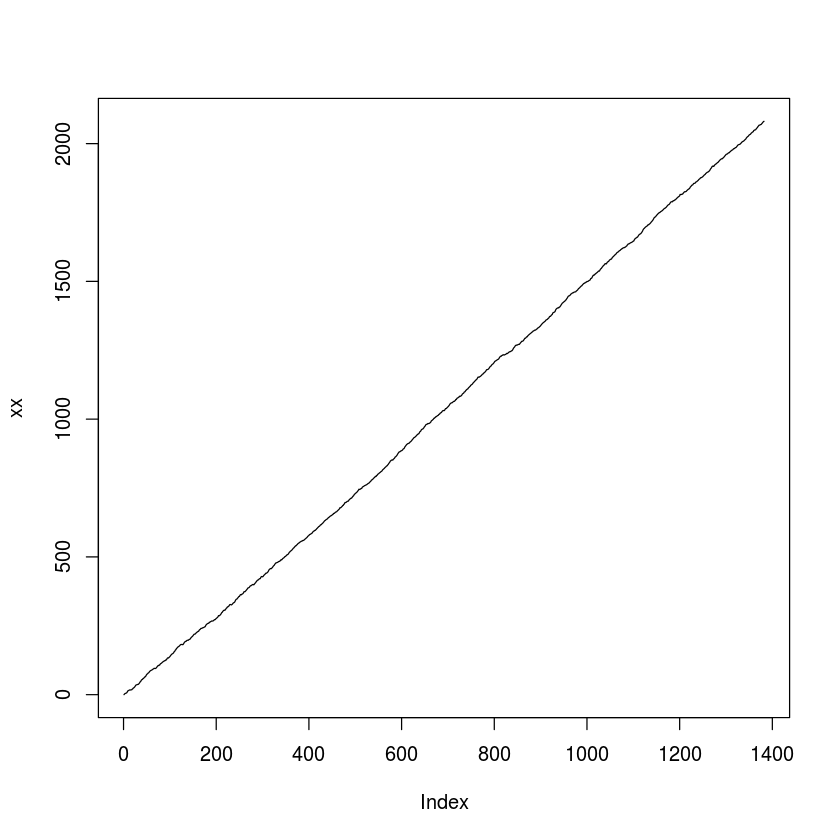

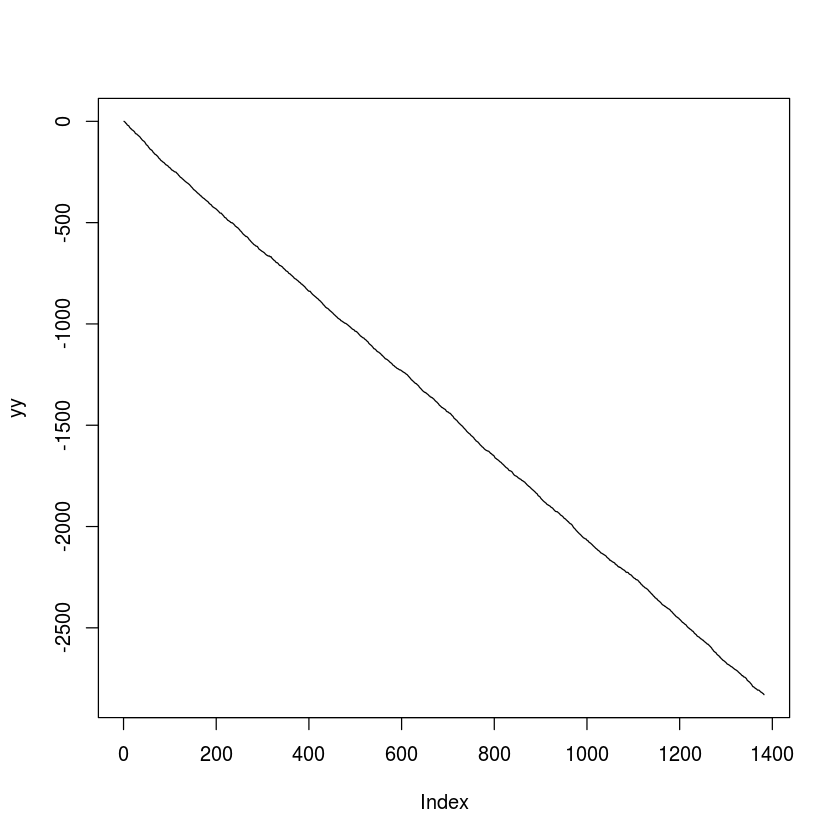

In [60]:
### simulate 
## both xx and yy are random walks
xx <- rep(0,1382)
for (i in 2:1382) {
    xx[i] <- 1.5 + xx[i-1] + rnorm(1)
}

yy <- rep(0,1382)
for (i in 2:1382) {
    yy[i] <- -2 + yy[i-1] + rnorm(1)
}

## create graphs
plot(xx, type = "l")
plot(yy, type = "l")

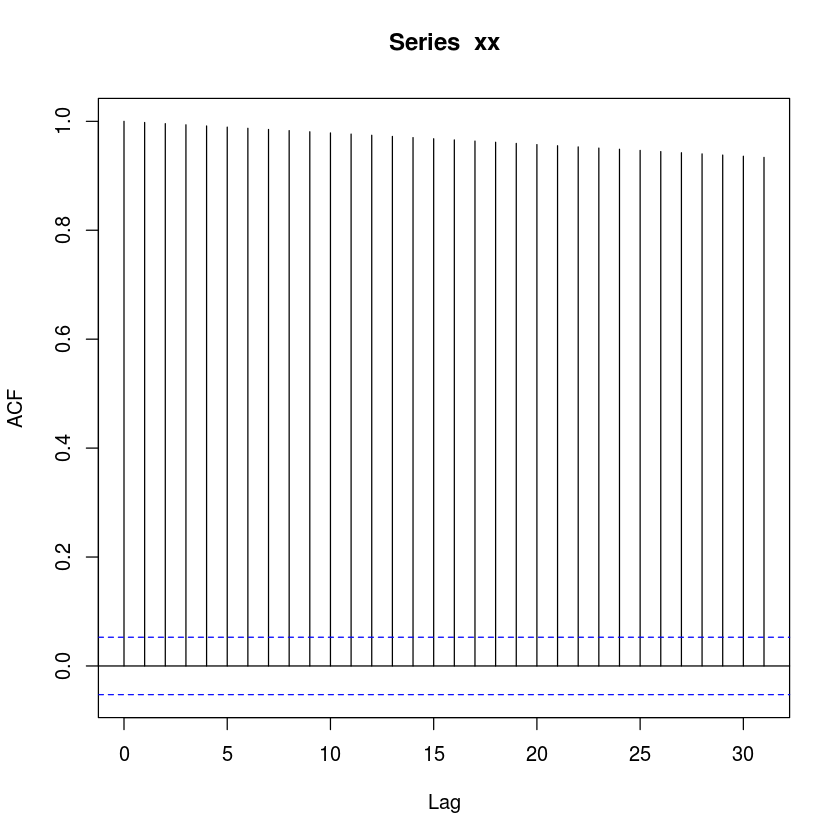

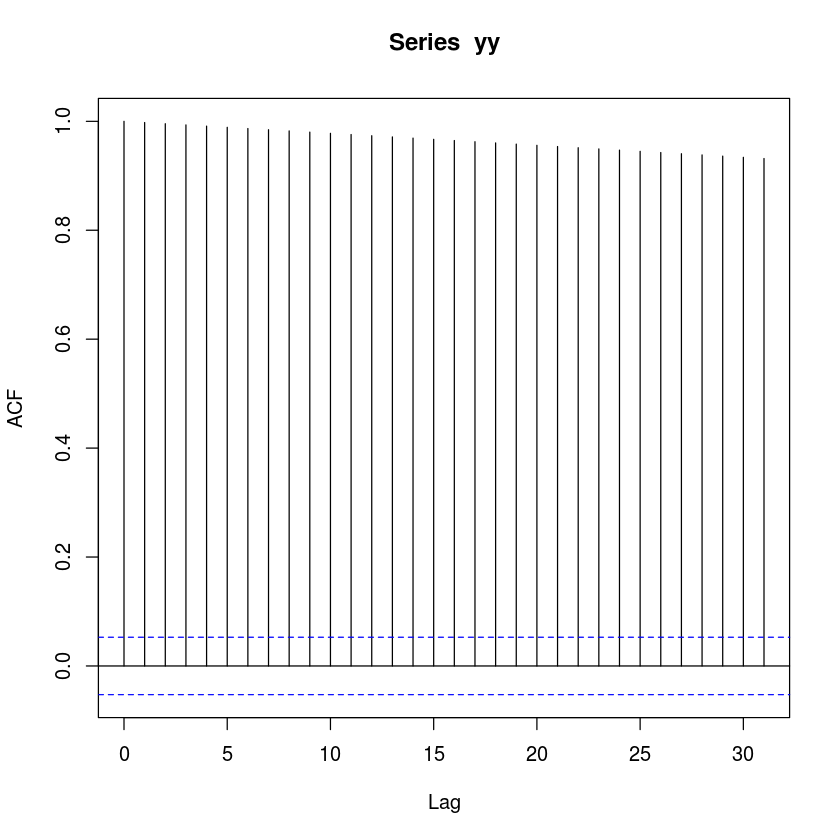

In [61]:
## take a look at ACF charts 
acf(xx)
acf(yy)

## corrolation does not die donw. when means, shocks does not die down 

In [64]:
## run arima model for m and n 
library(forecast)

modelM <- Arima(xx, order = c(1,0,0))
modelN <- Arima(yy, order = c(1,0,0))

modelM$coef
modelN$coef

ar1 intercept 
    1.000  1031.278

ar1 intercept 
     1.00  -1427.94

In [65]:
nonst <- read.csv("../data/module3_data_Simulated_Nonstationary.csv", header = T,
stringsAsFactors = F)
nonst$m = yy
nonst$n = xx


In [66]:
head(nonst)

dateid01,dateid,x,y,z,m,n
1900-01-01,1900-01-31 23:59:59.999,0.000000,0.0000000,0.000000,0.000000,0.000000
1900-02-01,1900-02-28 23:59:59.999,2.644404,-0.7233706,2.538293,-1.322033,2.169365
1900-03-01,1900-03-31 23:59:59.999,3.439934,2.1420958,2.227375,-3.952282,3.726485
1900-04-01,1900-04-30 23:59:59.999,3.615788,4.4931118,4.767550,-5.131392,4.724405
1900-05-01,1900-05-31 23:59:59.999,4.764565,5.0885692,4.051969,-9.458796,4.925748
1900-06-01,1900-06-30 23:59:59.999,5.636362,6.8153966,4.796927,-10.701033,6.133719


In [68]:
## run regression of m on n 
regMN <- lm(m ~ n, data = nonst)
summary(regMN)

## we can see a strign nagetive corrolations beetween these two. 
## but they are actually independent. the significant coefficient is because of non-stationarity 


Call:
lm(formula = m ~ n, data = nonst)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.998 -10.715  -1.198   8.511  52.335 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -5.076e+01  7.255e-01   -69.96   <2e-16 ***
n           -1.337e+00  6.066e-04 -2204.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.68 on 1380 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 4.858e+06 on 1 and 1380 DF,  p-value: < 2.2e-16


### Now, how can we identify if a time series is stationary or non-stationary 

Unite root test

In [94]:
## load sample data 
df <- read.csv("../data/module3_data_PE_Ratios.csv", header = T, stringsAsFactors= F)
head(df)

dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
1954-02-01,1954-02-28 23:59:59.999,1954-02-26,NA,NA,NA,NA,9.920
1954-03-01,1954-03-31 23:59:59.999,1954-03-31,NA,NA,NA,NA,10.170
1954-04-01,1954-04-30 23:59:59.999,1954-04-30,NA,NA,NA,NA,10.570
1954-05-01,1954-05-31 23:59:59.999,1954-05-31,NA,NA,NA,NA,11.000
1954-06-01,1954-06-30 23:59:59.999,1954-06-30,NA,NA,NA,NA,11.080
1954-07-01,1954-07-31 23:59:59.999,1954-07-30,NA,NA,NA,NA,12.174


In [110]:
## set time index and get Australia data
library(dplyr)

df$dateid01 <- as.Date(df$dateid01)
dat <- dplyr::filter(df, dateid01 >= as.Date("2000-4-1"))   ## filter df, only > 2000m4
pe_aus <- dat$pe_aus

#### Unite root tests -- ADF, PP, KPSS tests

In [115]:
library(urca)
library(tseries)

In [118]:
testadfn <- ur.df(pe_aus, type = "none", selectlags = c("AIC")) ## notrejected
summary(testadfn)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.746  -0.295   0.467   1.025  19.316 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1    -0.02042    0.01401  -1.457   0.1469  
z.diff.lag  0.15505    0.07468   2.076   0.0393 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.49 on 175 degrees of freedom
Multiple R-squared:  0.03276,	Adjusted R-squared:  0.0217 
F-statistic: 2.963 on 2 and 175 DF,  p-value: 0.05425


Value of test-statistic is: -1.4572 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [119]:
testadfc <- ur.df(pe_aus, type = c("drift"), selectlags = c("AIC")) ## Ho rejected***
summary(testadfc)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.230  -0.831  -0.150   0.497  19.666 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.63752    0.65533   2.499  0.01339 * 
z.lag.1     -0.07900    0.02721  -2.904  0.00417 **
z.diff.lag   0.18449    0.07452   2.476  0.01425 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.424 on 174 degrees of freedom
Multiple R-squared:  0.06626,	Adjusted R-squared:  0.05553 
F-statistic: 6.174 on 2 and 174 DF,  p-value: 0.002568


Value of test-statistic is: -2.9036 4.2155 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [120]:
## PP test ##reject if pval <= alpha // alpha = 0.1
pp1 <- ur.pp(pe_aus, type = c("Z-tau"), model = c("constant"), lags =c("long"))
summary(pp1) ## Ho rejected // intercept is statistically significant


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.883  -0.761  -0.130   0.503  20.286 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38341    0.65432   2.114   0.0359 *  
y.l1         0.93331    0.02706  34.485   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.476 on 176 degrees of freedom
Multiple R-squared:  0.8711,	Adjusted R-squared:  0.8704 
F-statistic:  1189 on 1 and 176 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -2.9474 

         aux. Z statistics
Z-tau-mu            2.5295

Critical values for Z statistics: 
                     1pct      5pct    10pct
critical values -3.468125 -2.877746 -2.57532


In [121]:
pp2 <- ur.pp(pe_aus, type = c("Z-tau"), model = c("trend"), lags =
c("long"))
summary(pp2) ## trend not significant, Ho not rejected


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.912  -0.830  -0.104   0.519  20.259 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.394701   0.657408   2.122   0.0353 *  
y.l1        0.932727   0.027224  34.262   <2e-16 ***
trend       0.001759   0.006567   0.268   0.7891    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.487 on 175 degrees of freedom
Multiple R-squared:  0.8711,	Adjusted R-squared:  0.8697 
F-statistic: 591.5 on 2 and 175 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -2.9575 

           aux. Z statistics
Z-tau-mu              0.9745
Z-tau-beta            0.3116

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -4.012224 

In [126]:
#KPSS test
testkp1 <- ur.kpss(pe_aus, type = c("mu"), lags = c("long")) ## Ho =stationary
summary(testkp1) ## Ho not rejected


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 13 lags. 

Value of test-statistic is: 0.0843 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [128]:
testkp2 <- ur.kpss(pe_aus, type = c("tau"), lags = c("long"))
summary(testkp2)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 13 lags. 

Value of test-statistic is: 0.0623 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


### Test for break point

In [129]:
## Breakpoint Unit Root Tests
brpoint <- ur.za(pe_aus, model = c("both"), lag = 3)
## The breakpoint from Zivot-Andrews test is one month later than Eviews...

In [131]:
summary(brpoint)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.310  -1.010   0.001   0.834  14.828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.56762    1.18331   3.015  0.00297 ** 
y.l1         0.83414    0.03542  23.551  < 2e-16 ***
trend       -0.01125    0.01397  -0.806  0.42166    
y.dl1        0.19074    0.07356   2.593  0.01036 *  
y.dl2        0.11028    0.07481   1.474  0.14232    
y.dl3        0.16387    0.07503   2.184  0.03036 *  
du           4.95875    1.67135   2.967  0.00345 ** 
dt          -0.07445    0.03259  -2.285  0.02359 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.321 on 167 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8859,	Adjusted R-squared:  0.8812 
F-statistic: 185.3 on 7 and 167 DF,  p-value: < 2.2e